<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(supervised_learning)_%EB%B6%84%EB%A5%98(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
pip install mglearn

In [57]:
# 한글 깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [58]:
import matplotlib.pyplot as plt
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


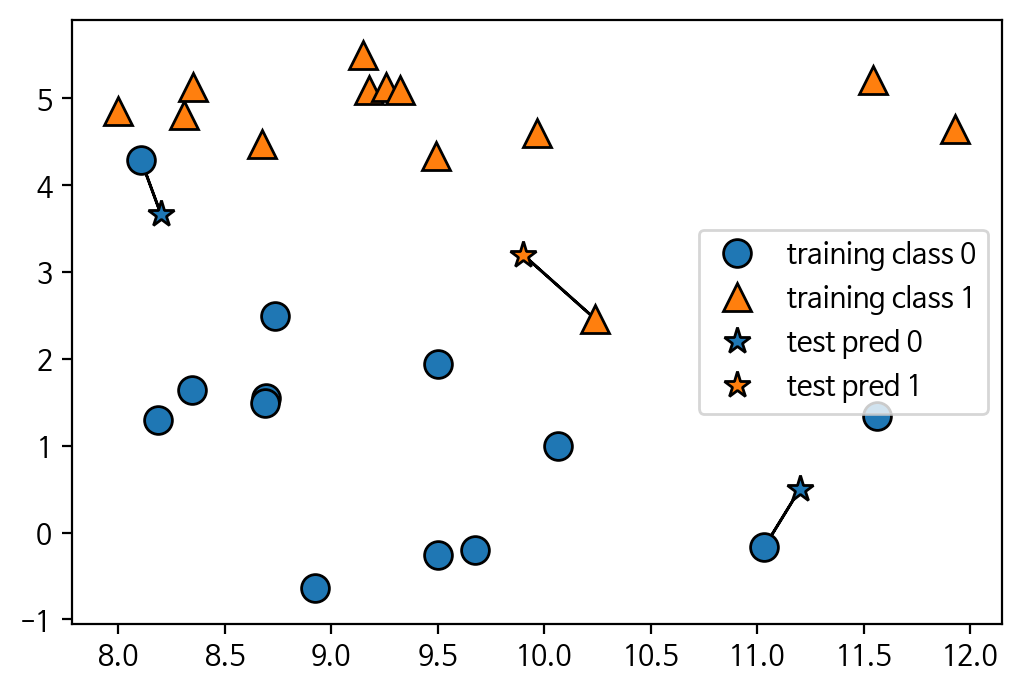

In [59]:
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃 선택

forge data set 분류 예 -> forge data set 에 대한 3-NN 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


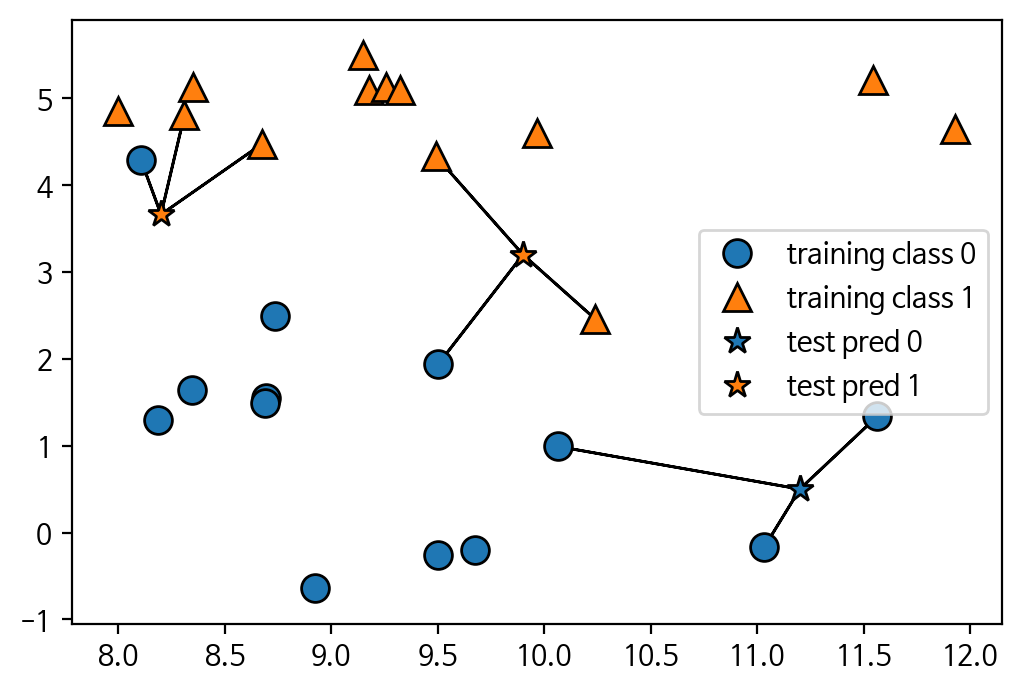

In [60]:
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=3) # 제일 근접한 3개 이웃 선택

분류 문제 정의 : forge data set을 사용한 이진 분류 (Label, 1) 예측하기 <br>
kNN 알고리즘 적용하여 예측하고 평가하기

데이터 준비하기

In [61]:
X, y = mglearn.datasets.make_forge() # X : 데이터(feature), y : 레이블(label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


일반화 성능을 평가할 수 있도록 데이터 분리(교차 검증) -> train set, test set

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

KNeighborsClassifier를 import하고 객체 생성

In [63]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) # 이웃의 수 3개 지정

train set를 사용하여 분류 모델 학습

In [64]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

test data에 대해 predict 메서드를 호출하여 예측

test set의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산 -> 다음 가장 많은 클래스를 찾기 -> 예측

In [65]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

모델이 얼마나 잘 일반화 되었는지 평가 -> 정확도

score() 함수 사용 -> test 데이터와 test 레이블을 넣어 호출

In [66]:
clf.score(X_test, y_test)

0.8571428571428571

In [67]:
clf.score(X_train, y_train)

0.9473684210526315

kNN 알고리즘 구현 - 분류

- 클래스 0과 클래스 1로 지정된 영역으로 나뉘는 결정경계(decision boundary) 확인 가능
- 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
- 이웃의 수를 늘릴 수록 결정경계는 더 부드러워짐
- 부드러운 경계는 더 단순한 모델을 의미

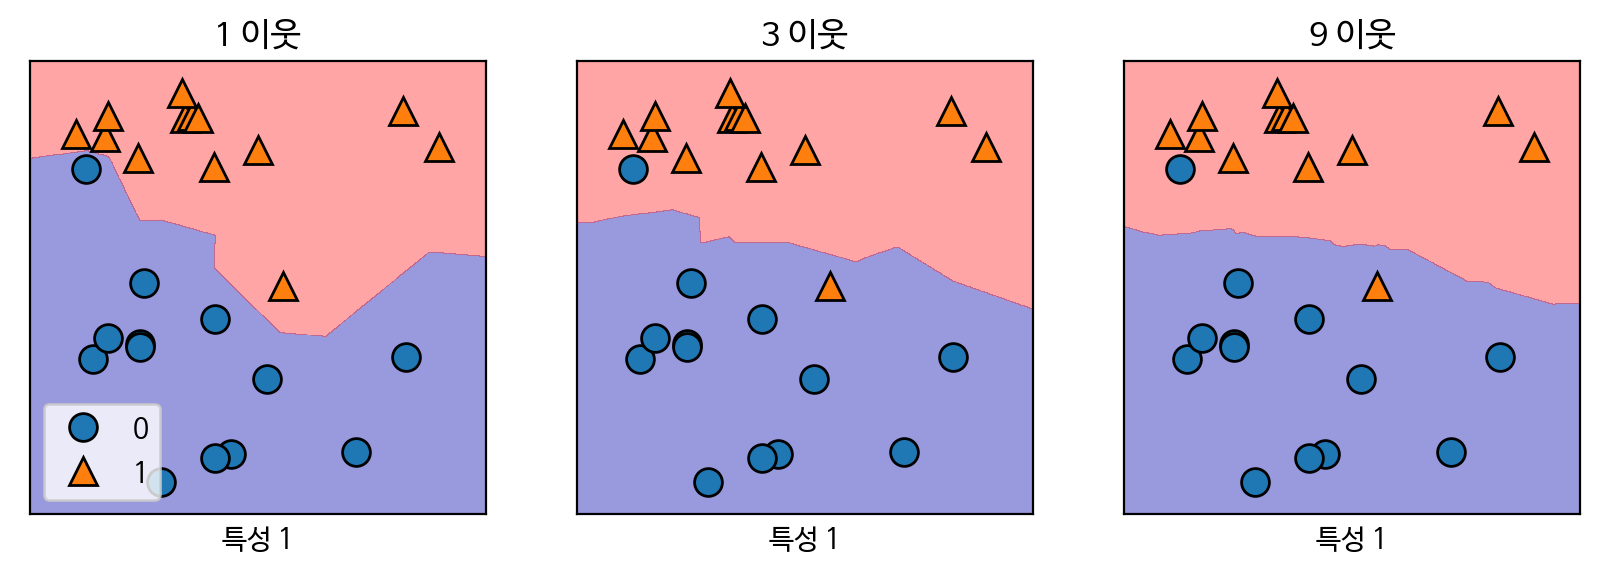

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(10,3), dpi = 100)

for n_neighbors, ax in zip([1, 3, 9], axes) : 
  # 이웃을 1,3,9 일때의 결정 경계(decision boundary)
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  
  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) # 결정 경계 그리기
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax) #2차원 산점도 data set 그리기 위해

  ax.set_title(f'{n_neighbors} 이웃')
  ax.set_xlabel('특성 0') 
  ax.set_xlabel('특성 1')

axes[0].legend(loc=3)
plt.show() 

이웃의 수(결정경계)에 따른 성능 평가

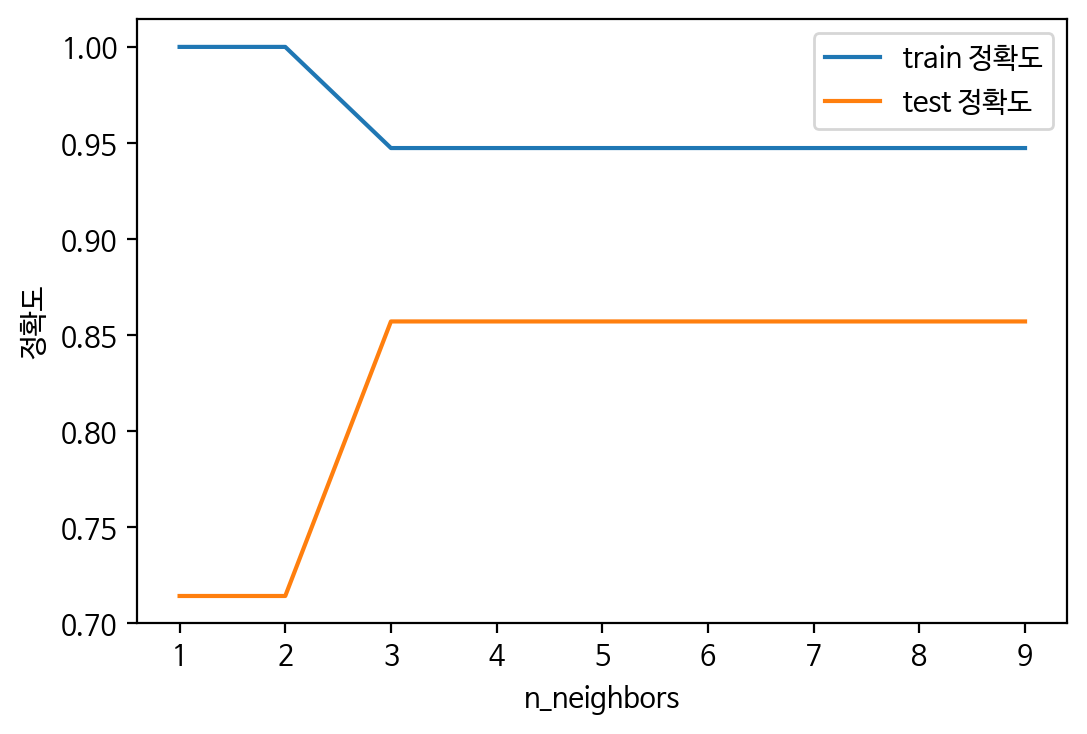

In [69]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1,10)

for n_neighbors in neighbors_setting :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # train set 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  # teset set 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# train vs test 정확도 시각화
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

plt.plot(neighbors_setting, train_accuracy, label='train 정확도')
plt.plot(neighbors_setting, test_accuracy, label='test 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# n_neighbors=3 이 가장 적합

유방암 data set을 사용하여 이웃의 수(결정경계)에 따른 성능평가

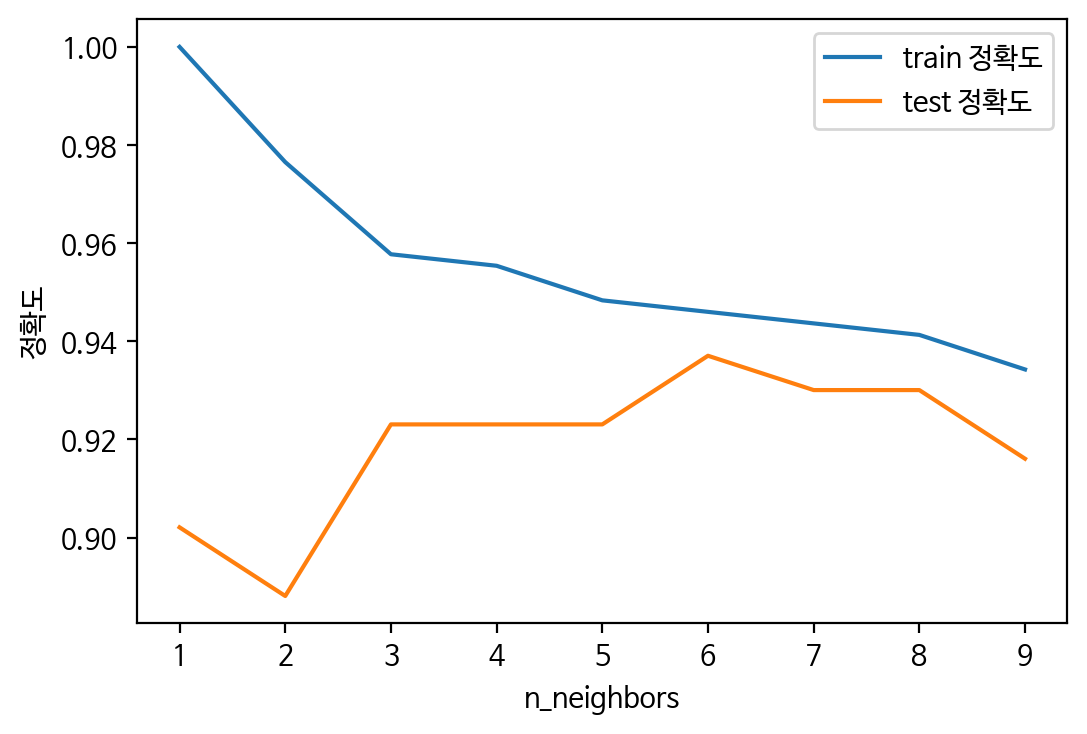

In [70]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
  cancer.target, stratify=cancer.target, random_state=66)

# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1,10)

for n_neighbors in neighbors_setting :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # train set 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  # teset set 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# train vs test 정확도 시각화
plt.figure(dpi= 100)
plt.rc('font', family = 'NAnumBarunGothic')

plt.plot(neighbors_setting, train_accuracy, label='train 정확도')
plt.plot(neighbors_setting, test_accuracy, label='test 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

# 수차례의 cross validation을 통해 최적점 구한다

성능평가 - ROC curve

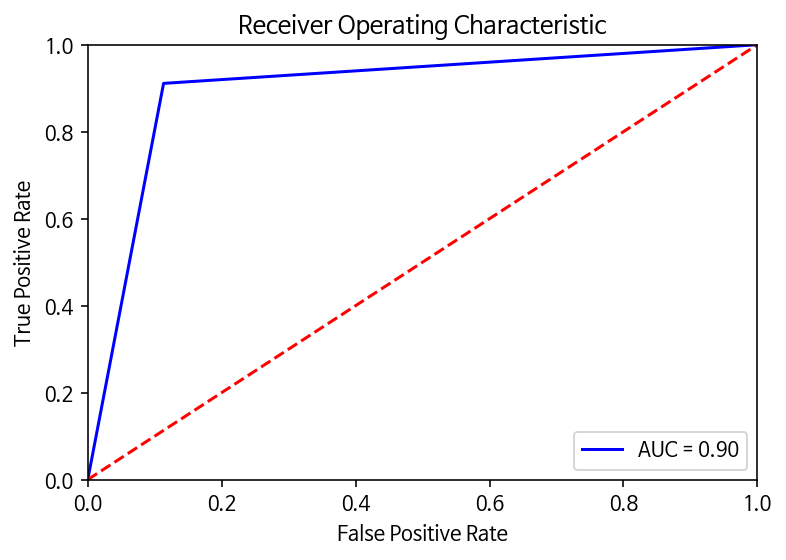

In [71]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I : plt

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = clf.predict(X_test)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        53
           1       0.93      0.91      0.92        90

    accuracy                           0.90       143
   macro avg       0.89      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



In [74]:
# sklearn을 이용하면 전부 계산해준다
print('accuracy', metrics.accuracy_score(y_test,y_hat))
print('precision', metrics.precision_score(y_test,y_hat))
print('recall', metrics.recall_score(y_test,y_hat))
print('f1', metrics.f1_score(y_test,y_hat))

accuracy 0.9020979020979021
precision 0.9318181818181818
recall 0.9111111111111111
f1 0.9213483146067416
